# Análisis Exploratio: datos IBEX 35
Irene Pico López

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 1. Descarga de los datos:

In [2]:
# Descargamos los datos históricos del IBEX 35 usando yfinance
ibex35 = yf.download('^IBEX', start='2010-01-01', end='2019-08-01')

# Mostramos las primeras y las últimas filas del DataFrame
ibex35

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,11986.500000,12145.099609,11986.099609,12145.099609,12145.086914,184200
2010-01-05,12141.799805,12240.500000,12139.799805,12204.400391,12204.387695,238400
2010-01-06,12216.400391,12230.700195,12147.599609,12222.500000,12222.487305,123800
2010-01-07,12163.000000,12199.700195,12079.099609,12166.299805,12166.287109,192400
2010-01-08,12218.000000,12232.200195,12079.900391,12163.000000,12162.987305,213200
...,...,...,...,...,...,...
2019-07-25,9354.599609,9453.000000,9232.000000,9289.900391,9289.900391,209481800
2019-07-26,9281.099609,9290.200195,9204.900391,9225.500000,9225.500000,220713700
2019-07-29,9201.299805,9257.400391,9194.400391,9215.400391,9215.400391,143203100


#### 2. Comprobación de valores ausentes:

In [3]:
# Información general del DataFrame
print(ibex35.info())
print('\n')
# Comprobación de valores nulos y valores NA
print('Valores nulos:')
print(ibex35.isnull().sum())
print('\n')

print('Valores NA:')
print(ibex35.isna().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2448 entries, 2010-01-04 to 2019-07-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2448 non-null   float64
 1   High       2448 non-null   float64
 2   Low        2448 non-null   float64
 3   Close      2448 non-null   float64
 4   Adj Close  2448 non-null   float64
 5   Volume     2448 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 133.9 KB
None


Valores nulos:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Valores NA:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#### 3. Visualización de la evolución temporal (Adj Close):

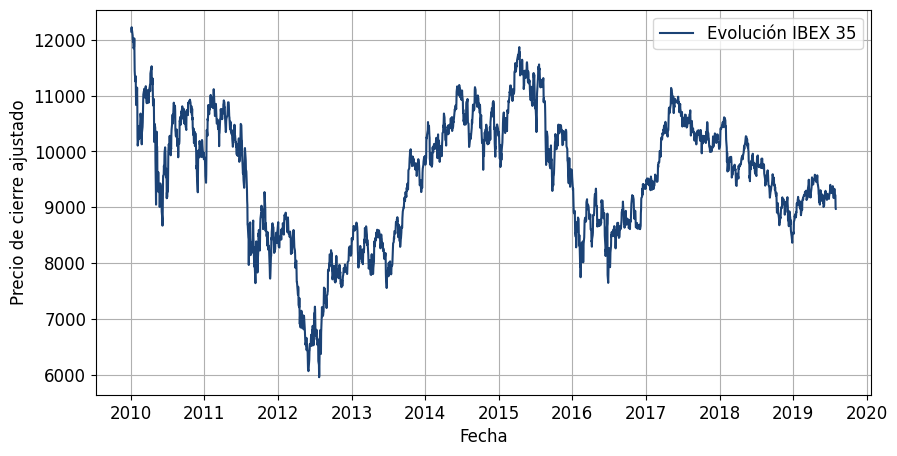

In [4]:
# Gráfico de la serie temporal del precio de cierre ajustado
plt.figure(figsize=(10, 5))
plt.plot(ibex35['Adj Close'], label='Evolución IBEX 35', color='#1b4275') 
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de cierre ajustado', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Aumentar el tamaño de los números en los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

#### 4. Estudio de la distribución estadística de las rentabilidades:

In [5]:
# Estadísticos principales DataFrame
print(ibex35.describe())

               Open          High           Low         Close     Adj Close  \
count   2448.000000   2448.000000   2448.000000   2448.000000   2448.000000   
mean    9537.147636   9608.952254   9449.929703   9531.743187   9531.736650   
std     1129.601003   1125.826136   1130.142221   1128.492787   1128.491954   
min     5950.399902   6093.100098   5905.299805   5956.299805   5956.293945   
25%     8684.824951   8756.199951   8608.600342   8685.924805   8685.924805   
50%     9679.799805   9747.399902   9596.100098   9677.900391   9677.890625   
75%    10399.850098  10476.674805  10323.025391  10395.174805  10395.164062   
max    12218.000000  12240.500000  12147.599609  12222.500000  12222.487305   

             Volume  
count  2.448000e+03  
mean   2.174318e+08  
std    1.034949e+08  
min    0.000000e+00  
25%    1.565826e+08  
50%    2.118862e+08  
75%    2.763186e+08  
max    7.894902e+08  


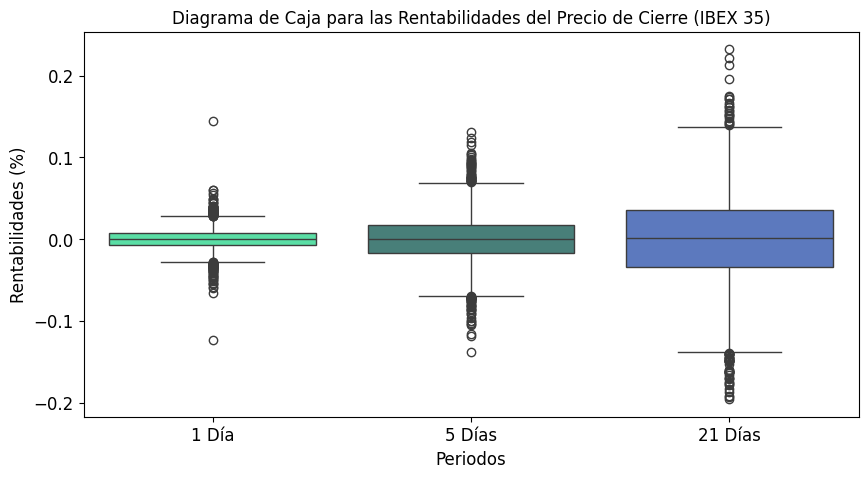

In [6]:
# Configurar el tamaño de los gráficos
plt.figure(figsize=(10, 5))

# Calcular las rentabilidades a distintos periodos usando la columna 'Close'
ret_1d = ibex35['Close'].pct_change(1)   # Rentabilidad a 1 día
ret_5d = ibex35['Close'].pct_change(5)   # Rentabilidad a 5 días
ret_21d = ibex35['Close'].pct_change(21) # Rentabilidad a 21 días

# Crear un nuevo DataFrame con las rentabilidades calculadas
rentabilidades = pd.DataFrame({
    '1 Día': ret_1d,
    '5 Días': ret_5d,
    '21 Días': ret_21d
})

# Crear un diagrama de caja para las rentabilidades a diferentes periodos
sns.boxplot(data=rentabilidades, 
            palette=['#44f4a8', '#3f8880', '#4c73ce'])

# Título y etiquetas del gráfico
plt.title('Diagrama de Caja para las Rentabilidades del Precio de Cierre (IBEX 35)')
plt.xlabel('Periodos', fontsize=12)
plt.ylabel('Rentabilidades (%)', fontsize=12)

# Aumentar el tamaño de los números en los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()


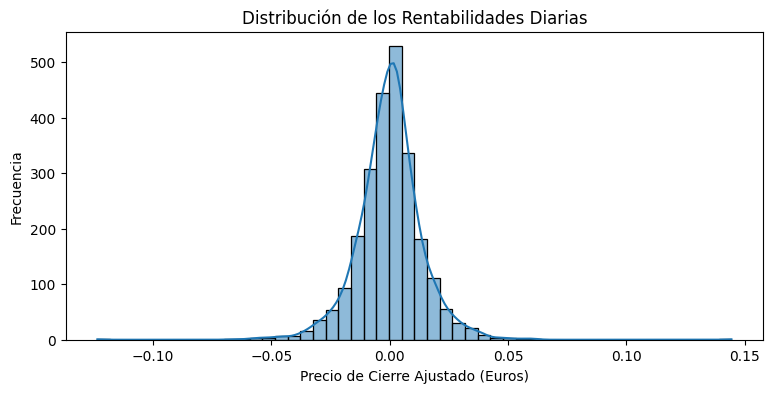

In [7]:
# Histograma de las rentabilidades diarias
plt.figure(figsize=(9, 4))
ret_1 = ibex35['Adj Close'].pct_change(1)
sns.histplot(ret_1, bins=50, kde=True)
plt.title('Distribución de los Rentabilidades Diarias')
plt.xlabel('Precio de Cierre Ajustado (Euros)')
plt.ylabel('Frecuencia')
plt.show()


#### 5. Análisis de correlaciones:

In [8]:
# Seleccionar las columnas relevantes para el análisis de correlación
df_corr = ibex35[['Open', 'High', 'Low', 'Adj Close', 'Volume']]

# Calcular la matriz de correlación
correlation_matrix = df_corr.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

               Open      High       Low  Adj Close    Volume
Open       1.000000  0.997974  0.997395   0.994953 -0.106427
High       0.997974  1.000000  0.996942   0.997600 -0.100106
Low        0.997395  0.996942  1.000000   0.997840 -0.114761
Adj Close  0.994953  0.997600  0.997840   1.000000 -0.107734
Volume    -0.106427 -0.100106 -0.114761  -0.107734  1.000000


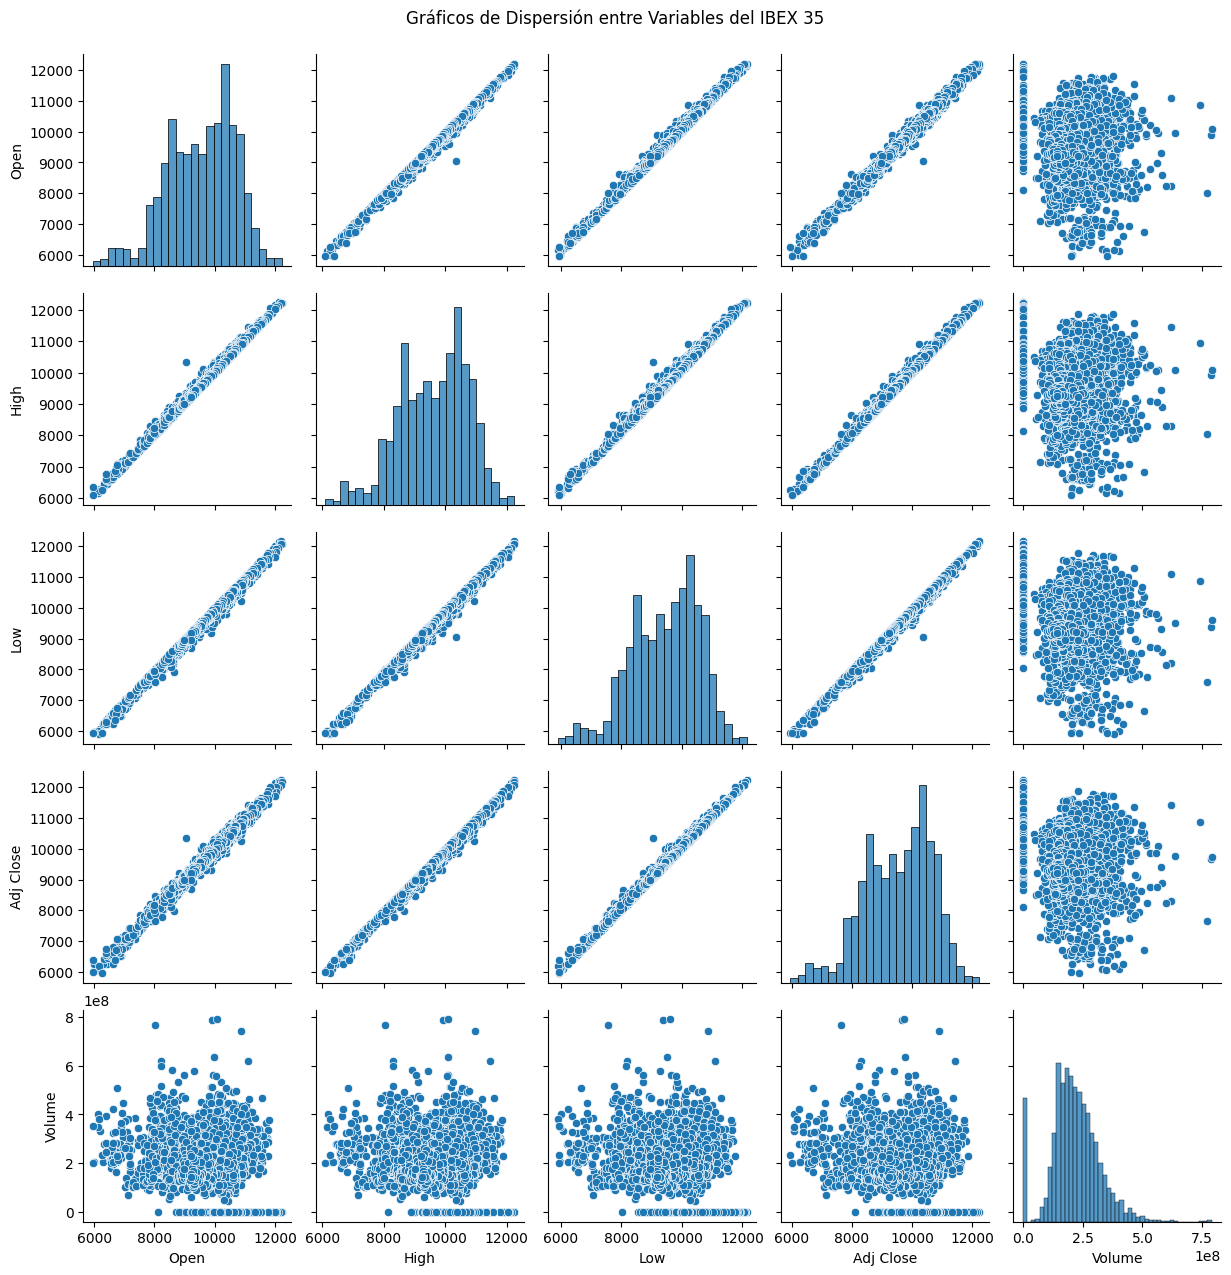

In [9]:
# Seleccionar las columnas relevantes para el análisis de dispersión
df_scatter = ibex35[['Open', 'High', 'Low', 'Adj Close', 'Volume']]

# Crear un par de gráficos de dispersión
sns.pairplot(df_scatter)
plt.suptitle('Gráficos de Dispersión entre Variables del IBEX 35', y=1.02)
plt.show()

#### 6.Almacenamiento de los datos:

In [10]:
# Guardamos los datos en un archivo HDF5
ibex35.to_hdf('ibex35.h5', key='rawData', mode='w')

In [11]:
# Mostramos todas las claves en el archivo
with pd.HDFStore('ibex35.h5', mode='r') as hdf:
    print(hdf.keys())  

['/rawData']
